# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# za pierwszym razem instalujemy
using Pkg
#Pkg.add("DataFrames")

   Updating registry at `C:\Users\szady\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\szady\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\szady\.julia\environments\v1.5\Manifest.toml`


In [2]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [54]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Array{Float64,1}

In [55]:
typeof(df1.Col3)

Array{Bool,1}

In [56]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [57]:
# ilosc wierszy
size(df2, 1) 

10

In [58]:
#ilosc kolumn
size(df2, 2) 

3

In [59]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [60]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [61]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [62]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [63]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793
 1.4142135623730951

In [64]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [65]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1


In [66]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,0
2,6,2.0,1
3,7,3.14159,1
4,8,1.41421,0
5,9,3.0,1
6,10,4.0,0


In [67]:
# nazwy kolumn
names(df2)

3-element Array{String,1}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [68]:
# typy kolumn
eltype.(eachcol(df2))

3-element Array{DataType,1}:
 Int64
 Float64
 Bool

In [69]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,0,1.0,1,0,Bool


In [70]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [71]:
var(df2.Col2)

0.9150284373648316

In [72]:
#Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

LoadError: [91mArgumentError: "winequality.csv" is not a valid file[39m

In [74]:
describe(mydata)

LoadError: [91mUndefVarError: mydata not defined[39m

In [23]:
typeof(mydata)

DataFrame

In [24]:
size(mydata)

(1599, 12)

In [25]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,7.4,0.7,0.0,1.9,0.076,11.0
5,7.4,0.66,0.0,1.8,0.075,13.0
6,7.9,0.6,0.06,1.6,0.069,15.0
7,7.5,0.5,0.36,6.1,0.071,17.0
8,6.7,0.58,0.08,1.8,0.097,15.0
9,7.5,0.5,0.36,6.1,0.071,17.0


In [26]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

,quality,nrow
,Int64,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [27]:
combine(wine_grouped, "fixed acidity" => mean)

,quality,fixed acidity_mean
,Int64,Float64
1,5,8.16725
2,6,8.34718
3,7,8.87236
4,4,7.77925
5,8,8.56667
6,3,8.36


In [28]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [29]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [78]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.129866,1
2,2,4,0.693147,0.57171,0
3,3,6,1.09861,0.271523,1
4,4,8,1.38629,0.848898,0
5,5,10,1.60944,0.801779,1
6,6,12,1.79176,0.697202,0
7,7,14,1.94591,0.901534,1
8,8,16,2.07944,0.416148,0
9,9,18,2.19722,0.166271,1


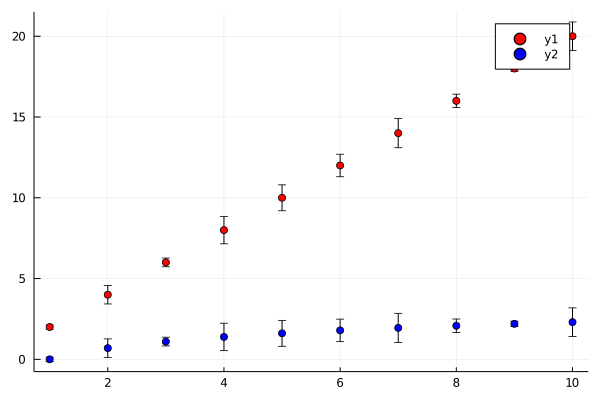

In [79]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})

using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


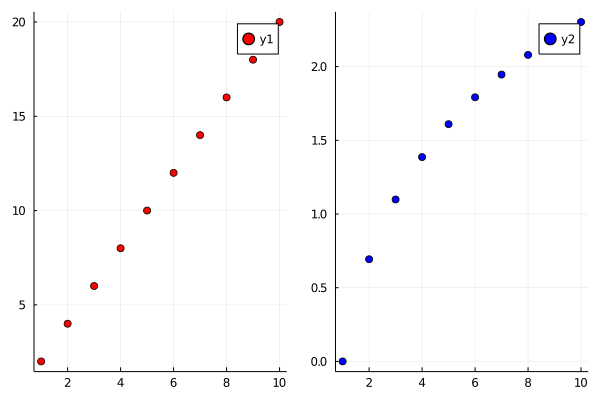

In [80]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

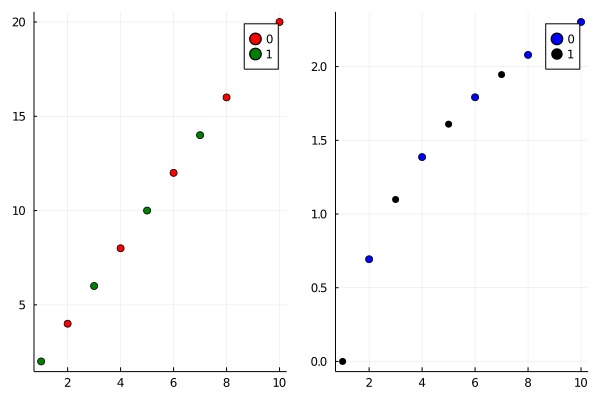

In [81]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [3]:
using LinearAlgebra
#Pkg.add("BenchmarkTools")
using BenchmarkTools
f(x,y) = dot(x,y) #Funkcja obliczajaca iloczyn skalarny

f (generic function with 1 method)

In [4]:
f((1,3),(4,6))

22

In [5]:
g(matrix,vector) = matrix * vector

g (generic function with 1 method)

In [18]:
#Testy dla n = 1,2,...500
times = zeros(0)
dimension = zeros(0)
operation = []
for i in 1:500
    for j in 1:10
        v1 = rand(i,1)
        v2 = rand(i,1)
        m1 = rand(i,i)
        append!(times,@elapsed f(v1,v2))
        append!(times,@elapsed g(m1,v2))
        append!(operation,"S") #S - scalar multiplication
        append!(operation,"M") #M - matrix multiplication with vector
        append!(dimension,i)
        append!(dimension,i)
    end
end

In [42]:
df = DataFrame(operation = operation,times = times,dimension = dimension)
CSV.write("Tasklab2.csv",df)

"Tasklab2.csv"

In [43]:
dfinput = CSV.read("Tasklab2.csv",delim = ",",DataFrame)

,operation,times,dimension
,String,Float64,Float64
1,S,2.8e-6,1.0
2,M,5.401e-6,1.0
3,S,2.01e-7,1.0
4,M,4.0e-7,1.0
5,S,0.0,1.0
6,M,3.0e-7,1.0
7,S,1.01e-7,1.0
8,M,3.0e-7,1.0
9,S,1.0e-7,1.0


In [44]:
describe(dfinput)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,operation,,M,,S,0,String
2,times,4.37901e-5,0.0,1.001e-6,0.0010226,0,Float64
3,dimension,250.5,1.0,250.5,500.0,0,Float64


In [101]:
gdf = groupby(dfinput, [:dimension,:operation])
gdf = combine(gdf,:times => mean,:times => std)

,dimension,operation,times_mean,times_std
,Float64,String,Float64,Float64
1,1.0,S,3.5e-7,8.63147e-7
2,1.0,M,8.001e-7,1.61758e-6
3,2.0,S,7.97e-8,4.20081e-8
4,2.0,M,3.598e-7,2.41303e-7
5,3.0,S,5.0e-8,5.27088e-8
6,3.0,M,2.401e-7,6.98609e-8
7,4.0,S,7.99e-8,4.21201e-8
8,4.0,M,2.898e-7,3.19054e-8
9,5.0,S,7.01e-8,4.83792e-8


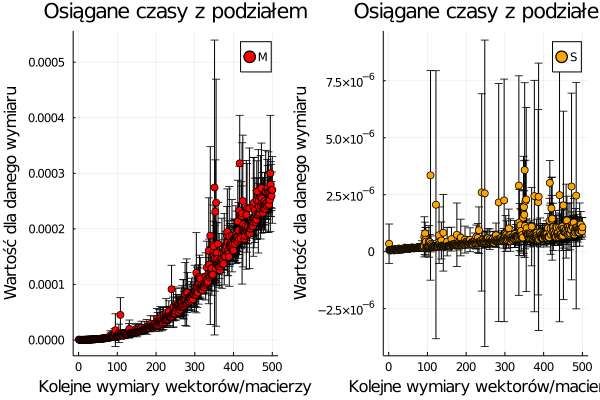

In [114]:
scatter(gdf.dimension,gdf.times_mean,group = gdf.operation,colour = [:red :orange],title = "Osiągane czasy z podziałem", yerr = gdf.times_std, layout = 2)
xlabel!("Kolejne wymiary wektorów/macierzy")
ylabel!("Wartość dla danego wymiaru")
